In [6]:
from collections import defaultdict
import pickle
import os

class ActorMovieNetwork:
    def __init__(self):
        """Creates a bipartite actor–movie network"""
        self.movie_to_actors = defaultdict(set)  # movie -> actors
        self.actor_to_movies = defaultdict(set)  # actor -> movies

    # -------------------------
    # Counts
    # -------------------------

    def getNumMovies(self):
        return len(self.movie_to_actors)

    def getNumActors(self):
        return len(self.actor_to_movies)

    def getNumEdges(self):
        """Each edge is one (actor, movie) appearance"""
        return sum(len(actors) for actors in self.movie_to_actors.values())

    # -------------------------
    # Construction
    # -------------------------

    def addAppearance(self, movie, actor):
        """Add an actor–movie edge"""
        self.movie_to_actors[movie].add(actor)
        self.actor_to_movies[actor].add(movie)

    # -------------------------
    # Queries
    # -------------------------

    def getActors(self, movie):
        return self.movie_to_actors.get(movie, set())

    def getMovies(self, actor):
        return self.actor_to_movies.get(actor, set())

    def degreeMovie(self, movie):
        return len(self.getActors(movie))

    def degreeActor(self, actor):
        return len(self.getMovies(actor))

    def visualize_network(self):
        """Visualize the actor–movie bipartite network"""
        import networkx as nx
        import matplotlib.pyplot as plt
    
        G = nx.Graph()
    
        # Add movie nodes (one partition)
        for movie in self.movie_to_actors:
            G.add_node(movie, bipartite=0)
    
        # Add actor nodes (other partition) and edges
        for movie, actors in self.movie_to_actors.items():
            for actor in actors:
                G.add_node(actor, bipartite=1)
                G.add_edge(movie, actor)
    
        # Separate nodes by type
        movies = [n for n, d in G.nodes(data=True) if d["bipartite"] == 0]
        actors = [n for n, d in G.nodes(data=True) if d["bipartite"] == 1]
    
        # Bipartite layout
        pos = {}
        pos.update((node, (0, i)) for i, node in enumerate(movies))
        pos.update((node, (1, i)) for i, node in enumerate(actors))
    
        # Draw
        plt.figure(figsize=(12, 8))
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_size=500,
            font_size=8,
            edge_color="gray"
        )
    
        # Color nodes by type
        nx.draw_networkx_nodes(G, pos, nodelist=movies, node_color="lightblue", label="Movies")
        nx.draw_networkx_nodes(G, pos, nodelist=actors, node_color="lightgreen", label="Actors")
    
        plt.title("Actor–Movie Bipartite Network")
        plt.axis("off")
        plt.show()

    # -------------------------
    # Persistence
    # -------------------------

    def save(self, path):
        """Serialize the object using pickle"""
        os.makedirs(os.path.dirname(path), exist_ok=True)
        with open(path, "wb") as f:
            pickle.dump(self, f)

#Bipartite graph, Undirected, Unweighted

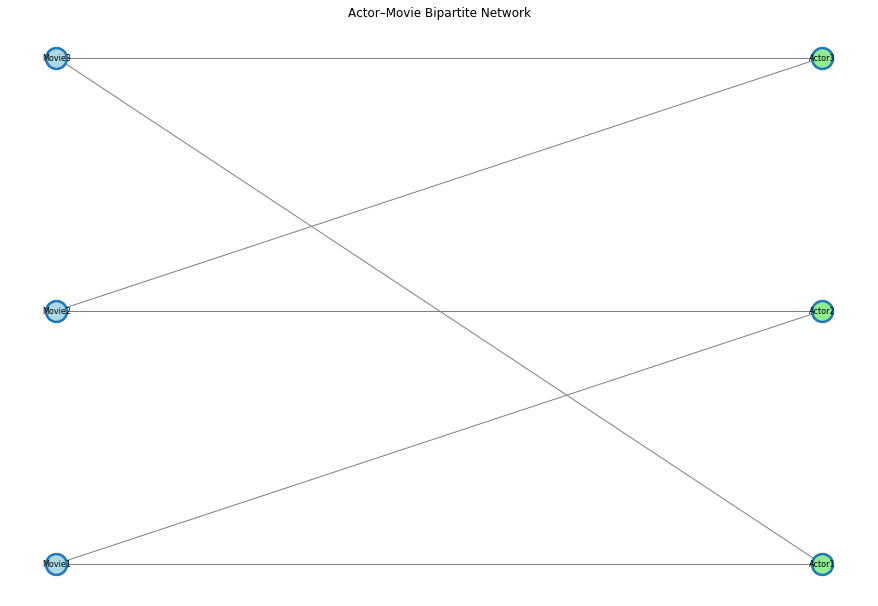

In [9]:
network = ActorMovieNetwork()

network.addAppearance("Movie1", "Actor1")
network.addAppearance("Movie1", "Actor2")

network.addAppearance("Movie2", "Actor2")
network.addAppearance("Movie2", "Actor3")

network.addAppearance("Movie3", "Actor1")
network.addAppearance("Movie3", "Actor3")

network.visualize_network()
